# ECE 6254 - Statistical Machine Learning
## Project - Loonie
### Mathematical Analysis of Undersampling 

#### Import Libraries

In [33]:
import numpy as np
import matplotlib.pyplot as plt
import random
import statistics
from matplotlib.transforms import Bbox

#### Function Definition

In [18]:
def plot_histogram(x_mi, x_ma, undersampled=False):
    if undersampled:
         plt.hist(x_ma, bins=25, alpha=0.6, color='r', label='Majority Class Undersampled')
    else:
        plt.hist(x_ma, bins=25, alpha=0.6, color='r', label='Majority Class')
    plt.hist(x_mi, bins=25, alpha=0.6, color='b', label='Minority Class')

    plt.grid(True,which='major',linewidth=0.5)
    plt.grid(True,which='minor',linewidth=0.1)
    plt.xlabel("$x$")
    plt.ylabel("Count")
    plt.legend(loc='upper left',fontsize='small')

In [62]:
def full_extent(ax, pad=0.0):
    """Get the full extent of an axes, including axes labels, tick labels, and
    titles."""
    # For text objects, we need to draw the figure first, otherwise the extents
    # are undefined.
    ax.figure.canvas.draw()
    items = ax.get_xticklabels() + ax.get_yticklabels() 
    #items += [ax, ax.title, ax.xaxis.label, ax.yaxis.label]
    #items += [ax, ax.title]
    items += [ax.get_xaxis().get_label(), ax.get_yaxis().get_label()]
    bbox = Bbox.union([item.get_window_extent() for item in items])

    return bbox.expanded(0.98 + pad, 0.93 + pad)

In [94]:
def posterior_bias(x_mi, x_ma, pi_mi, Beta_opt, graph_name, range_min=-15, range_max=15):
    fig = plt.figure(figsize=(7,10))
    ax1 = fig.add_subplot(2,1,1) #First subplot -> Histogram of growing \Beta
    ax2 = fig.add_subplot(2,1,2) #Second subplot -> Bias in probability
    n_mi, bin_mi, bars = ax1.hist(x_mi, bins=range(range_min, range_max, 1), alpha=0.4, color='b', label='Minority Class')
    
    for ii in range(0, len(Beta_opt)):
        x_ma_undersampled = x_ma[random.sample(range(1, int((1-pi_mi)*N)),int(Beta_opt[ii]*(1-pi_mi)*N))]
        n_ma, bin_ma, bars = ax1.hist(x_ma_undersampled, bins=range(range_min, range_max, 1), alpha=0.3, color='r',
                                      label=['Majority Class Undersampled with B='+str(Beta_opt[ii])])
        ind=np.where((n_mi+n_ma)>0)
        p_us_mi= n_mi[ind]/(n_mi[ind]+n_ma[ind])
        ax2.plot(bin_ma[ind]+0.5, p_us_mi,  'o-', label=r'$\beta = $'+str(Beta_opt[ii])) #alpha=0.3,

    plt.xlabel("$x$")
    plt.ylabel("$p$")
    plt.grid(True,which='major',linewidth=0.5)
    plt.grid(True,which='minor',linewidth=0.1)
    plt.legend(loc='lower left',fontsize='small')
    plt.xlim([range_min+5,range_max-5])
    ax1.set_ylabel('Count')
    ax1.set_xlabel('$x$')
    ax1.grid()
    
    #Save the figure of the posterior bias only
    # Save just the portion _inside_ the second axis's boundaries
    extent = full_extent(ax2).transformed(fig.dpi_scale_trans.inverted())
    fig.savefig(graph_name, bbox_inches=extent)

# Let's start simple in 1 Dimension

In [19]:
pi_mi = 0.2    # Proportion of minority class
N = 1e7       # Total number of samples
mu_mi = 0
sigma_mi = 3
mu_ma = 3
sigma_ma = 3

In [20]:
# Samples of minority class
x_mi = np.random.normal(loc=mu_mi, scale=sigma_mi, size=(int(pi_mi*N), 1))
# Samples of majority class
x_ma = np.random.normal(loc=mu_ma, scale=sigma_ma, size=(int((1-pi_mi)*N), 1))

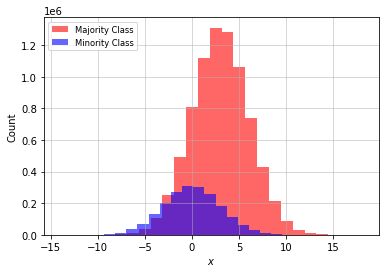

In [21]:
plot_histogram(x_mi, x_ma)

In [22]:
Beta = 0.25 # Probability of selecting a sample from the majority class
x_ma_undersampled = x_ma[random.sample(range(1, int((1-pi_mi)*N)),int(Beta*(1-pi_mi)*N))]

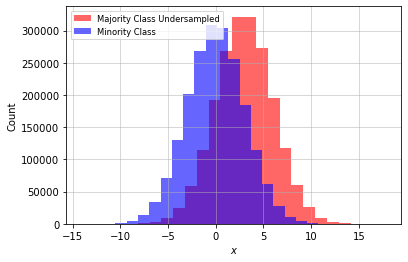

In [23]:
# Plot the udersampled histogram.
plot_histogram(x_mi, x_ma_undersampled, True)

## 1. Complexity of Hypothesis Set
Undersampling removes samples from the majority dataset. The number of samples available limits the complexity of the hypothesis dataset over which the ML algorithm can generalize.
<br><br>
This consequence should be addressed in the report but no specific coding is needed.

## 2. Sampling Selection Bias
https://www3.nd.edu/~dial/publications/dalpozzolo2015calibrating.pdf <br>


### Posterior Probability

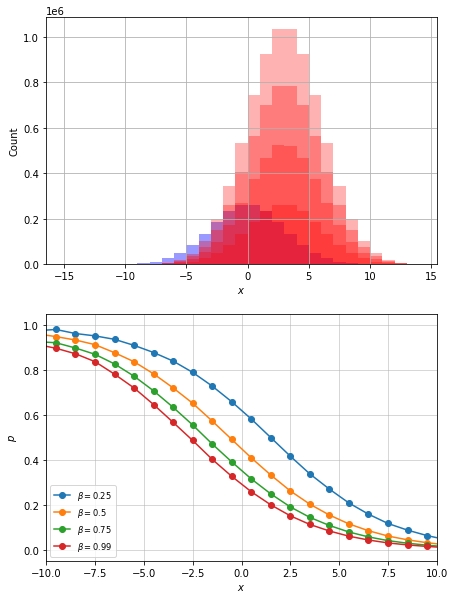

In [95]:
Beta_opt = [0.25, 0.5, 0.75, 0.99] # Probability of selecting a sample from the majority class
graph_name = 'posterior_bias.png'
posterior_bias(x_mi, x_ma, pi_mi, Beta_opt, graph_name)


As $\beta$ decreases the posterior probability, $P(\mathrm{minority}|x)$, decreases. In other words, removing samples with undersampling moves the classification boundary so that more samples are classified as the minority. The stronger
the undersampling, the larger the shift.

### How does separability affect the bias?
We expect that the more separable, the lower the bias/shift.

In [40]:
mu_ma = 13 # Increased the distance between classes by 10
x_ma_separated = np.random.normal(loc=mu_ma, scale=sigma_ma, size=(int((1-pi_mi)*N), 1))

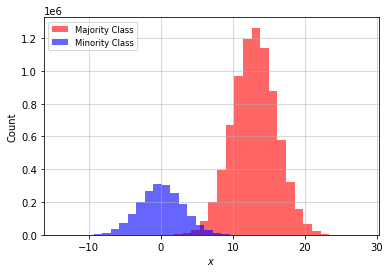

In [41]:
# Plot separated histogram.
plot_histogram(x_mi, x_ma_separated)

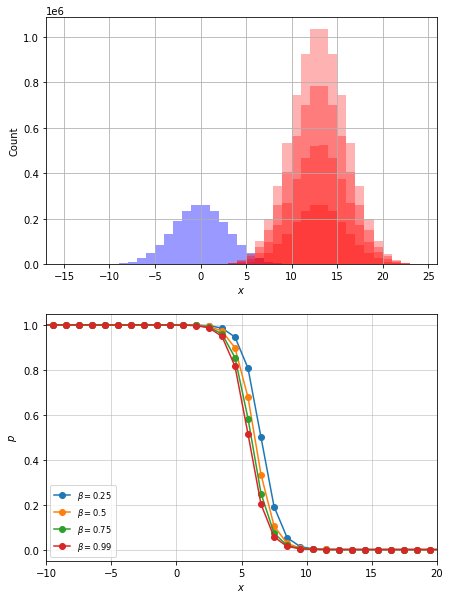

In [96]:
Beta_opt = [0.25, 0.5, 0.75, 0.99] # Probability of selecting a sample from the majority class
graph_name = 'posterior_bias_separated.png'
posterior_bias(x_mi, x_ma_separated, pi_mi, Beta_opt, graph_name, range_max=25)

## 3. Sample Variance

In [79]:
Beta_opt_percentage = [5,10,15,20,25,40,60,80,95]
#variance = [0] * len(Beta_opt_percentage)
pvariance = [0] * len(Beta_opt_percentage)
#stdev = [0] * len(Beta_opt_percentage)
iterations = 1000
for iter in range(0, iterations):
    x = np.random.normal(loc=0, scale=10, size=(100, 1))
    for jj in range(0, len(Beta_opt_percentage)):
        x_undersampled = x[random.sample(range(1, 100), Beta_opt_percentage[jj]*1)]
        #variance[jj] = variance[jj] + statistics.variance(x_undersampled[:, 0])
        pvariance[jj] = pvariance[jj] + statistics.pvariance(x_undersampled[:, 0])
        #stdev[jj] = stdev[jj] + statistics.stdev(x_undersampled[:, 0], xbar=0)

In [80]:
#variance = [x / iterations for x in variance]
pvariance = [x / iterations for x in pvariance]
#stdev = [x / iterations for x in stdev]
#stdev = [x*x for x in stdev]

Text(0, 0.5, '$\\sigma^2$')

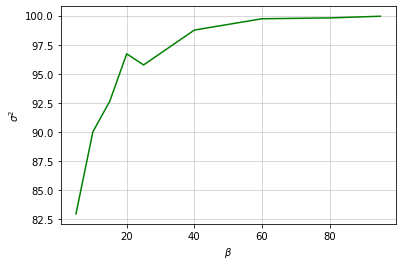

In [93]:
#plt.plot(Beta_opt_percentage, variance, 'r')
plt.plot(Beta_opt_percentage, pvariance, 'g')
#plt.plot(Beta_opt_percentage, stdev, 'b')
plt.grid(True,which='major',linewidth=0.5)
plt.grid(True,which='minor',linewidth=0.1)
plt.xlabel(r"$\beta$")
plt.ylabel("$\sigma^2$")

As the undersampling is less agressive, that is, as the number of samples in the majority classes employed increases, the estimated variance approaches the true variance: $\sigma^2 = 100$

### Standard Error of the Mean (SEM)

The Standard Error of the Mean (SEM), which gives the standard deviation of the sample mean of  $N$  values from a normal distribution:
$$
\mathrm{SEM}=\frac{\sigma}{\sqrt{N}}\approx\frac{\sigma_{s}}{\sqrt{N}},
$$
where $\sigma_s$ is the sample stardard deviation.

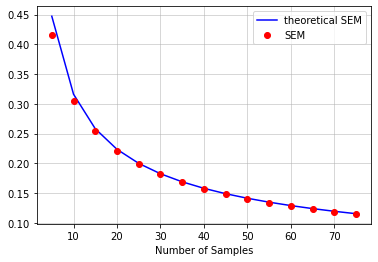

In [90]:
iterations = 1000
nts = np.arange(5, 80,5)
n_nts = len(nts)

SEMs = 1 / np.sqrt(nts)  # theory, for normal distribution

sems_exp = np.zeros(nts.shape)
sems_sample = np.zeros(nts.shape)

for i, nt in enumerate(nts):
    y = np.random.randn(iterations, nt)
    y_means = y.mean(axis=1)
    y_stds = y.std(axis=1, ddof=1)
    sems_exp[i] = y_means.std()
    sems_sample[i] = y_stds.mean() / np.sqrt(nt)
    
fig, ax = plt.subplots()
#ax.plot(nts, sems_exp, 'gx', label='std dev of mean')
ax.plot(nts, SEMs, 'b-', label='theoretical SEM')
ax.plot(nts, sems_sample, 'ro', label='SEM')
ax.locator_params(axis='x', integer=True)
ax.legend(loc='upper right')
ax.set_xlabel('Number of Samples');
plt.grid(True,which='major',linewidth=0.5)
plt.grid(True,which='minor',linewidth=0.1)

As the sample size increases, sample means cluster more closely around the population mean.

Note that for few number of samples we uderestimate the SEM. This is because the SEM is calculated based on $\sigma_s$, which as we saw on some homework, is biased (Not ussing Bessels correction $\rightarrow N-1$).

# Let's translate the findings to 2 Dimensions

# To-Do
* Redo in 2D, with mutivariate Gaussians